### Airports mapped

### 1: Make an altair scatter plot of US airports.
* Use pandas to read the csv. You should have it in your folder already.
* altair needs to be imported and needs the notebook renderer to be enabled. (Look at prior notebooks if you don't recall how to do this.)
* Use only US airports that are medium or large. 
* Encode x and y as longitude and latitude  to see points that represent airport locations.
* When we hover over each point, we should see the name of the airport. (Hint: look up tooltip)

##### 1.1 import libraries, enable altair in the notebook, read the airports.csv file

In [1]:
import pandas as pd
import altair as alt


alt.renderers.enable('notebook')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [2]:
airports = pd.read_csv('http://136.183.56.191/DSA501public/airports.csv')

##### 1.2 examine the data and make a new dataframe with the criteria we want

In [3]:
# We want the medium_airport or large_airport airport in the US
# size is in 'type'
# country is in iso_country


filtered_airports = airports[airports['iso_country'] == 'US' ]
filtered_airports = filtered_airports[(filtered_airports['type'] == 'large_airport') | (filtered_airports['type'] == 'medium_airport')]
filtered_airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
5562,45760,4PS3,medium_airport,Paraport Airstrip,41.788417,-79.518586,1400.0,NaN,US,US-PA,Warren,no,4PS3,NaN,4PS3,NaN,NaN,NaN
6151,12243,5A8,medium_airport,Aleknagik / New Airport,59.282600,-158.617996,66.0,NaN,US,US-AK,Aleknagik,yes,5A8,WKK,5A8,NaN,http://en.wikipedia.org/wiki/Aleknagik_Airport,NaN
25467,19042,K79J,medium_airport,South Alabama Regional At Bill Benton Field Ai...,31.308800,-86.393799,310.0,NaN,US,US-AL,Andalusia/Opp,no,K79J,NaN,79J,NaN,http://en.wikipedia.org/wiki/Andalusia-Opp_Air...,Andalusia Opp Airport
25647,3356,KABE,medium_airport,Lehigh Valley International Airport,40.652100,-75.440804,393.0,NaN,US,US-PA,Allentown,yes,KABE,ABE,ABE,NaN,http://en.wikipedia.org/wiki/Lehigh_Valley_Int...,NaN
25648,3357,KABI,medium_airport,Abilene Regional Airport,32.411301,-99.681900,1791.0,NaN,US,US-TX,Abilene,yes,KABI,ABI,ABI,NaN,http://en.wikipedia.org/wiki/Abilene_Regional_...,NaN


##### 1.3 Graph using altair. Look up tooltip if needed.

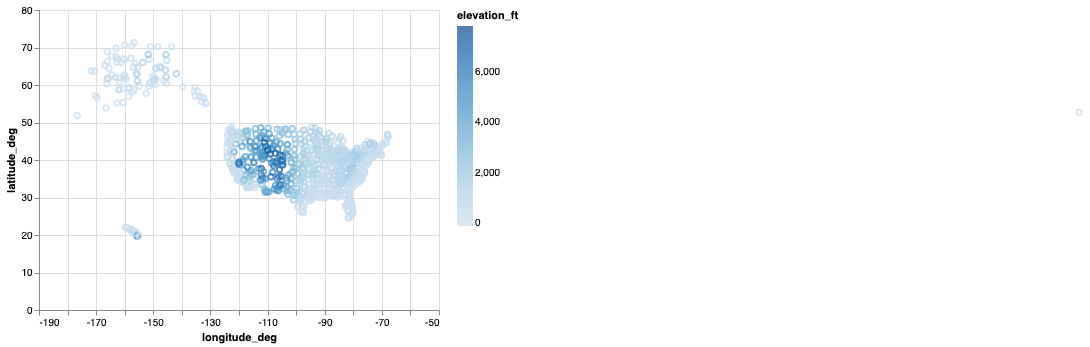

In [4]:
# altair graph of a scatter plot.

alt.Chart(filtered_airports).mark_point().encode(
    alt.X('longitude_deg',
        scale=alt.Scale(domain=(-190, -50))
    ),
    y='latitude_deg',
    tooltip=['latitude_deg', 'longitude_deg', 'name'],
    color='elevation_ft'
)

#### What are some of the problems you see with this graph?

#### 1.4 Change the chart to use latitude, longitude and a projection

In [1]:
AIRPORTS = alt.Chart(filtered_airports).mark_point().encode(
    longitude='longitude_deg',
    latitude='latitude_deg',
    tooltip=['latitude_deg', 'longitude_deg', 'name'],
    color='elevation_ft'
).project('albersUsa')
AIRPORTS

NameError: name 'alt' is not defined

##### 1.5 Add a background geoshape of the U.S.

In [5]:
map = 'https://raw.githubusercontent.com/vega/vega/master/docs/data/us-10m.json'

USA = alt.Chart(alt.topo_feature(map,feature ='states')).mark_geoshape(fill = 'white',stroke = 'black').project('albersUsa')

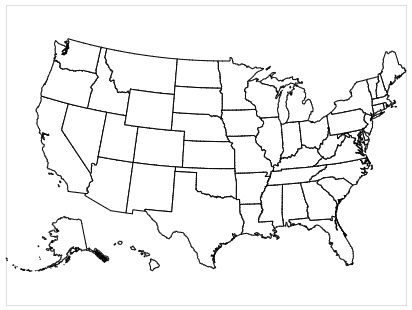

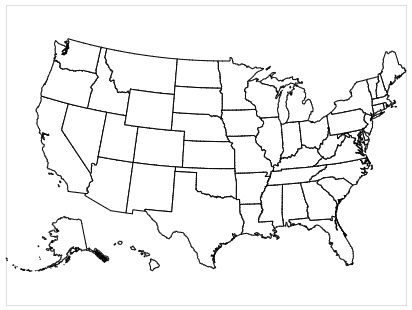

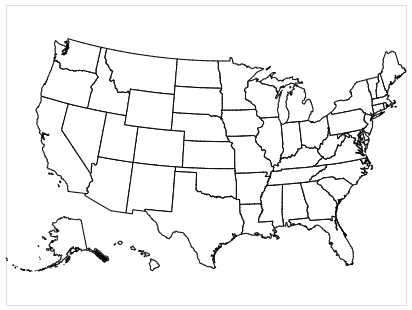

In [61]:
USA

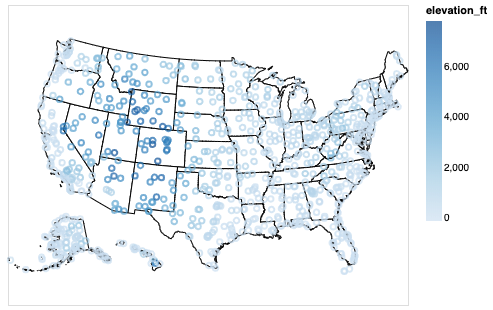

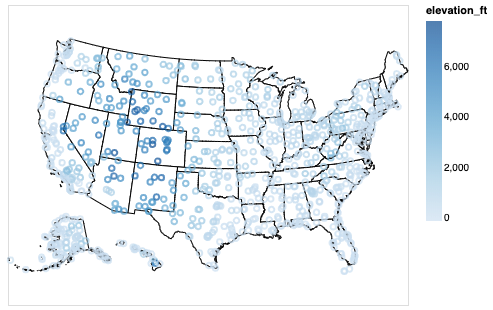

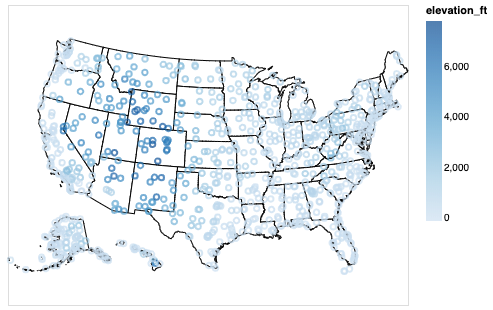

In [63]:
USA + AIRPORTS

In [65]:
filtered_airports[filtered_airports['name'] == '34S Airport']

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
47921,325543,US-0742,medium_airport,34S Airport,19.145168,-16.875,NaN,NaN,US,US-U-A,NaN,no,NaN,NaN,NaN,https://outreached.org/,NaN,NaN
